<a href="https://colab.research.google.com/github/Uliana-san/Japan/blob/master/Ishiba_Kishida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №1

    Описание работы: цель работы - сравнение речей официальных выступлений премьер-министров Японии Сигэру Исиба и Фумио Кисида. Данные речи были произнесены премьер-министрами в момент вступления на должность, в которых премьер-министр выделяет направления работы на свой срок. Выбор текстов обусловлен тем, что речи сказанные при одинаковых обстоятельствах и с одинаковой целью, что делает их сравнительный анализ более уместным.  

    Цель работы: поиск схожих или отличных черт в текстах инугурационных речей бывшего и нынешнего премьер-министров Японии.

## Этап 1 - Парсинг данных

    Для парсинга была использована консоль DevTools и Javascript, так как сайт написан с использованием JavaScript и с помощью модулей requests или BeautifulSoup не получалось "вытащить" текст в нужной кодировке, чтобы япоснкий язык отображался верно.
    Код:

// Основной текст
const mainText = document.querySelector('main')?.innerText || document.body.innerText;

// Создаем Blob (файл в памяти)
const blob = new Blob([mainText], { type: 'text/plain' });

// Создаем ссылку для скачивания
const link = document.createElement('a');
link.href = URL.createObjectURL(blob);
link.download = 'ishiba_text.txt';

// Добавляем ссылку в документ
document.body.appendChild(link);
link.click();
document.body.removeChild(link);

-----

// Основной текст
const mainText = document.querySelector('main')?.innerText || document.body.innerText;

// Создаем Blob (файл в памяти)
const blob = new Blob([mainText], { type: 'text/plain' });

// Создаем ссылку для скачивания
const link = document.createElement('a');
link.href = URL.createObjectURL(blob);
link.download = 'kishida_text.txt'; // Имя файла

// Добавляем ссылку в документ, кликаем по ней и удаляем
document.body.appendChild(link);
link.click();
document.body.removeChild(link);

    



## Этап 2 - Исследование и Визуализация

1. Описание данных

    Типы: тексты инаугурационных речей, с которыми выступали действующий и предыдущий премьер-министры Японии - Фумио Кисида и Сигэру Исиба.

    Метаданные: автор(в данном случае - премьер-министр, который произносил речь); дата; заголовок; количество частей; содержание; жанр.

In [ ]:
# Выделяем метаданные

import pandas as pd
title_ishiba = '第二百十四回国会における石破内閣総理大臣所信表明演説'
author1 = " "
date1 = ' '
count_ishiba = -1
contents_ishiba = list()
duration1 = '34:16'


with open('/kaggle/input/ishiba_text/other/default/1/ishiba_text.txt', 'r', encoding='utf-8') as ishiba:
    for line in ishiba:
        line = line.strip()  # Убираем лишние пробелы и переводы строк
        if line.startswith("筆者："):  # Проверяем, начинается ли строка с "автор:"
            author1 = line.split("：")[1].strip()  # Получаем имя автора после двоеточия
        elif line.startswith('更新日：'):
            date1 = line.split("：")[1].strip()
        elif line.startswith("▼"):
            count_ishiba += 1
            contents_ishiba.append(line.strip("▼"))

title_kishida = '第二百十二回国会における岸田内閣総理大臣所信表明演説'
author2 = " "
date2 = ' '
count_kishida = -1
contents_kishida = list()
duration = "34:54"
genre = 'official speech'

with open('/kaggle/input/kishida_text/other/default/1/kishida_text.txt', 'r', encoding='utf-8') as kishida:
    for line in kishida:
        line = line.strip()
        if line.startswith("筆者："):
            author2 = line.split("：")[1].strip()
        elif line.startswith('更新日：'):
            date2 = line.split("：")[1].strip()
        elif line.startswith("▼"):
            count_kishida += 1
            contents_kishida.append(line.strip("▼"))


In [ ]:
# Делаем датасет

data = [
    [title_kishida, author2, date2, count_kishida, ", ".join(contents_kishida), duration1, genre],
    [title_ishiba, author1, date1, count_ishiba, ", ".join(contents_ishiba), duration, genre]
]

df = pd.DataFrame(data, columns=["title", "author", "date", "parts", "content", "duration", "genre"])
print(df)

                        title author        date  parts  \
0  第二百十二回国会における岸田内閣総理大臣所信表明演説   岸田文雄  令和5年10月23日      5   
1  第二百十四回国会における石破内閣総理大臣所信表明演説    石破茂   令和6年10月4日      7   

                                             content duration            genre  
0  演説全文を読む, はじめに　～変化の流れを掴み取る～, 経済・経済・経済, 社会, 外交・安...    34:16  official speech  
1  演説全文を読む, はじめに, ルールを守る, 日本を守る, 国民を守る, 地方を守る, 若者...    34:54  official speech  


2. Пропуски и качество данных, а также выбросы и ошибки

   В метаданных пропусков нет.
   В качестве пропусков в текстах будем считать пустые строки.

In [ ]:
# Определим количество пустых строк и их процент
with open("/kaggle/input/ishiba_text/other/default/1/ishiba_text.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

df1 = pd.DataFrame({"line": [line.strip() for line in lines]})


df1["letters_in_line"] = df1["line"].str.len()


empty_lines_percent = (df1["letters_in_line"] == 0).mean() * 100

In [ ]:
print(round(empty_lines_percent, 2)) # Процент пустых строк в речи Исиба Сигэру

19.62


In [ ]:
print(df1[df1['line'].str.len()<10]) # Строки, в которых меньше 10 знаков, т.е. те, которые содержательно скорее всего ничего не дадут

         line  letters_in_line
0      筆者：石破茂                6
4        関連動画                4
5          開く                2
6         閉じる                3
7                            0
..        ...              ...
151  第99代菅 義偉                8
152        開く                2
153       閉じる                3
155      タグ一覧                4
156     すべて見る                5

[71 rows x 2 columns]


Если присмотреться, то это строки, которые не имеют отношения к содержанию - это шапка и подвал сайта, с которого была получена информация. При ручном просмотре текста я выделила его содержательную часть, которую стоит оставить.

In [ ]:
# Выделим нужный текст
lines_ishiba = []
capture = False

with open('ishiba_text.txt', 'r', encoding='utf-8') as ishiba:
    for line in ishiba:
        cleaned_line = line.strip()

        if cleaned_line == "演説全文":
            capture = True
            continue
        if cleaned_line == "もっと見る":
            capture = False
            break
        if capture:
            lines_ishiba.append(cleaned_line)

# Объединяем строки в единый текст
filtered_text_ishiba = "\n".join(line for line in lines_ishiba if line.strip())


In [ ]:
# То же самое для Кисида Фумио
with open("/kaggle/input/kishida_text/other/default/1/kishida_text.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

df2 = pd.DataFrame({"line": [line.strip() for line in lines]})

df2["letters_in_line"] = df2["line"].str.len()

empty_lines_percent1 = (df2["letters_in_line"] == 0).mean() * 100
print(round(empty_lines_percent1, 2)) # процент пустых строк

13.37


In [ ]:
print(df2[df2['line'].str.len()<10])

         line  letters_in_line
0     筆者：岸田文雄                7
1    #新しい資本主義                8
2       #成長戦略                5
3       #分配戦略                5
6       #災害対応                5
..        ...              ...
179  #北朝鮮ミサイル                8
180  #新しい資本主義                8
181     #成長戦略                5
182   #気候変動問題                7
184     #災害対応                5

[83 rows x 2 columns]


Здесь также есть строки, которые не имеет смысла анализировать и которые могут стать лишними при смысловом анализе.

In [ ]:
lines_kishida = list()
capture = False

with open('kishida_text.txt', 'r', encoding='utf-8') as kishida:
    for line in kishida:
        cleaned_line = line.strip()

        if cleaned_line == "演説全文":
            capture = True
            continue
        if cleaned_line == "関連リンク":
            capture = False
            break
        if capture:
            lines_kishida.append(cleaned_line)

filtered_text_kishida = "\n".join(line for line in lines_kishida if line.strip())

3. Типы данных и их соответствие

   Посмотрим структуру данных.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2 non-null      object
 1   author    2 non-null      object
 2   date      2 non-null      object
 3   parts     2 non-null      int64 
 4   content   2 non-null      object
 5   duration  2 non-null      object
 6   genre     2 non-null      object
dtypes: int64(1), object(6)
memory usage: 240.0+ bytes


Все переменные в формате строки, что не совсем корректно, так как у нас есть и временной промежуток, и дата.

In [ ]:
# Приведем временной промежуток к нужному формату.
df["duration"] = pd.to_timedelta(df["duration"].apply(lambda x: f"00:{x}"))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   title     2 non-null      object         
 1   author    2 non-null      object         
 2   date      2 non-null      object         
 3   parts     2 non-null      int64          
 4   content   2 non-null      object         
 5   duration  2 non-null      timedelta64[ns]
 6   genre     2 non-null      object         
dtypes: int64(1), object(5), timedelta64[ns](1)
memory usage: 240.0+ bytes


Так как дата указана в японском формате, необходимо установить библиотеку, чтобы ее обработать и привести к традиционному виду.

In [ ]:
!pip install datetimejp
from datetimejp import JDatetime
def convert_japanese_date(jp_date):
        jd = JDatetime.strptime(jp_date, '%g%e年%m月%d日')
        return jd.strftime('%Y-%m-%d')

df["date"] = df["date"].apply(convert_japanese_date)
# Также разобьем отдельно год, день и месяц на тот случай, если эти характеристики понадобятся нам отдельно.
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [ ]:
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   title     2 non-null      object         
 1   author    2 non-null      object         
 2   date      2 non-null      datetime64[ns] 
 3   parts     2 non-null      int64          
 4   content   2 non-null      object         
 5   duration  2 non-null      timedelta64[ns]
 6   genre     2 non-null      object         
 7   year      2 non-null      int32          
 8   month     2 non-null      int32          
 9   day       2 non-null      int32          
dtypes: datetime64[ns](1), int32(3), int64(1), object(4), timedelta64[ns](1)
memory usage: 264.0+ bytes
                        title author       date  parts  \
0  第二百十二回国会における岸田内閣総理大臣所信表明演説   岸田文雄 2023-10-23      5   
1  第二百十四回国会における石破内閣総理大臣所信表明演説    石破茂 2024-10-04      7   

                                             content    

Теперь есть датасет с 10 колонками, из которых две переменные - дата и временной промежуток, а третья - количество частей.

4. Описательные статистики и визуализации.

   Начнем с метаданных. Так как у нас всего два текста, то применять такие показатели, как среднее, медиана и т.д. не имеет особого смысла.  

In [ ]:
#Начнем с количества уникальных авторов

df["author"].nunique()

2

In [ ]:
#Кто они?
df["author"].unique()

array(['岸田文雄', '石破茂'], dtype=object)

*Перевод: Кисида Фумио и Исиба Сигэру.*

Посмотрим распределение по годам.

In [ ]:
df["year"].value_counts()

year
2023    1
2024    1
Name: count, dtype: int64

Text(0.5, 0, 'Год')

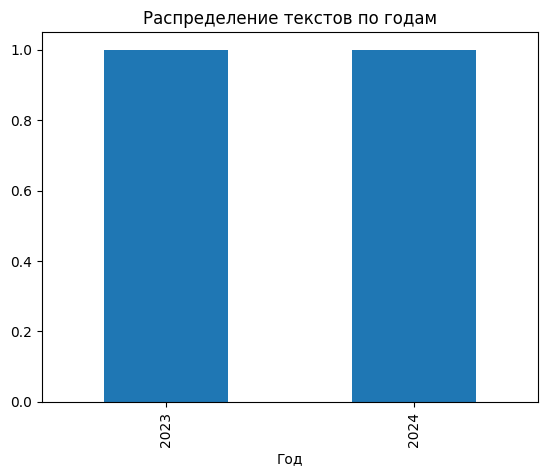

In [ ]:
import matplotlib.pyplot as plt
df["year"].value_counts().plot(kind="bar")
plt.title("Распределение текстов по годам")
plt.xlabel("Год")

Теперь посмотрим количество символов в каждом тексте.

In [ ]:
import re

clean_text_ishiba = "".join(re.findall(r'[\u3040-\u30FF\u4E00-\u9FFF]', filtered_text_ishiba))

char_count_ishiba = len(clean_text_ishiba)

print("Количество символов:", char_count_ishiba)


Количество символов: 9015


In [ ]:
clean_text_kishida = "".join(re.findall(r'[\u3040-\u30FF\u4E00-\u9FFF]', filtered_text_kishida))

char_count_kishida = len(clean_text_kishida)

print("Количество символов:", char_count_kishida)


Количество символов: 8119


In [ ]:
print(f"В речи Исиба на {char_count_ishiba - char_count_kishida} символов больше.")

В речи Исиба на 896 символов больше.


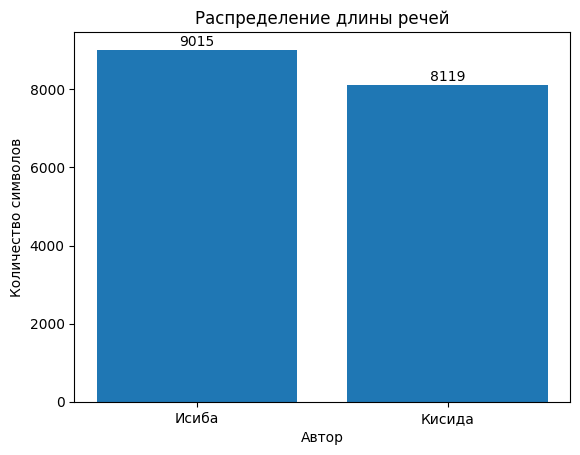

In [ ]:
lengths = [char_count_ishiba, char_count_kishida]
labels = ["Исиба", "Кисида"]

# Построение столбчатой диаграммы
plt.bar(labels, lengths)

plt.xlabel("Автор")
plt.ylabel("Количество символов")
plt.title("Распределение длины речей")

# Добавить отображение значений на столбцах
for i, v in enumerate(lengths):
    plt.text(i, v + 100, str(v), ha='center', fontsize=10)

plt.show()

Проанализируем частоту слов.

In [ ]:
# Для этого воспользуемся библиотекой fugashi

!pip install fugashi unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 33.3 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658818 sha256=e056d9c01062e5f3741ef81169b2dfd4c40ce161293bddbef808111eea240d49
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite


In [ ]:
import fugashi
tagger = fugashi.Tagger()
stop_words = {"こと", "もの", "よう", "それ", "これ", "あれ", "ため", "ところ", "場合", "何", "私", "僕", "あなた", "年"}
# список стоп-слов, создан вручную

In [ ]:
# Функция взята с https://github.com/polm/fugashi-sagemaker-demo/blob/master/fugashi%20wordcount.ipynb
from collections import Counter
wcpos = Counter()
for line in filtered_text_ishiba.split("\n"):
    for word in tagger(line):
        if (word.feature.pos2 == '普通名詞' and word.surface not in stop_words):
            wcpos[word.surface] += 1

for key, val in wcpos.most_common(10):
    print(val, key)

34 国民
31 経済
30 実現
26 地方
25 社会
24 安全
24 政治
20 皆
19 地域
18 保障


*Перевод: граждане, экономика, осуществление, регионы, общество, безопасность, политика, все, округа, гарантии.*

In [ ]:
wcpos1 = Counter()
for line in filtered_text_kishida.split("\n"):
    for word in tagger(line):
        if (word.feature.pos2 == '普通名詞' and word.surface not in stop_words):
            wcpos1[word.surface] += 1

for key, val in wcpos1.most_common(10):
    print(val, key)

33 経済
24 変化
21 国民
20 強化
20 社会
18 投資
15 対策
14 流れ
14 対応
13 デジタル


*Перевод: экономика, изменение, гражадане, усиление, общество, инвестиции, контрмеры, течение (так обычно говорят про деньги), соответствовать, цифровизация.*

Из этого можно выдвинуть гипотезу, что Кисида больше говорил об экономических мерах, чем Исиба.

5. Изучение признаков и визуализация.

   Частотность слов, уникальные слова, длина предложений.

In [ ]:
# Функция для расчёта частотности слов
def get_word_frequencies(text):
    word_freq = Counter()
    total_words = 0  # Общее количество слов в тексте

    for line in text.split("\n"):
        for word in tagger(line):
            if (word.feature.pos2 == '普通名詞' and word.surface not in stop_words):
                word_freq[word.surface] += 1
                total_words += 1

    word_freq_relative = {word: count / total_words for word, count in word_freq.items()}
    return word_freq_relative



In [ ]:
freq_ishiba = get_word_frequencies(filtered_text_ishiba)

In [ ]:
for word, freq in sorted(freq_ishiba.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{word}: {freq:.4f}")

国民: 0.0181
経済: 0.0165
実現: 0.0160
地方: 0.0138
社会: 0.0133
安全: 0.0128
政治: 0.0128
皆: 0.0106
地域: 0.0101
保障: 0.0096


Частотность слов в речи Исиба.

Частотность слов в речи Кисида:

In [ ]:
freq_kishida = get_word_frequencies(filtered_text_kishida)
for word, freq in sorted(freq_kishida.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{word}: {freq:.4f}")

経済: 0.0196
変化: 0.0143
国民: 0.0125
強化: 0.0119
社会: 0.0119
投資: 0.0107
対策: 0.0089
流れ: 0.0083
対応: 0.0083
デジタル: 0.0077


In [ ]:
!pip install wordcloud

In [ ]:
# Создадим облако слов
from wordcloud import WordCloud
FONT_PATH = '/kaggle/input/font-japan/NotoSansJP-VariableFont_wght.ttf'
wordcloud = WordCloud(font_path = FONT_PATH,
                      background_color="white",
                      colormap="summer",
                      collocations=False)
wordcloud.generate_from_frequencies(freq_ishiba)

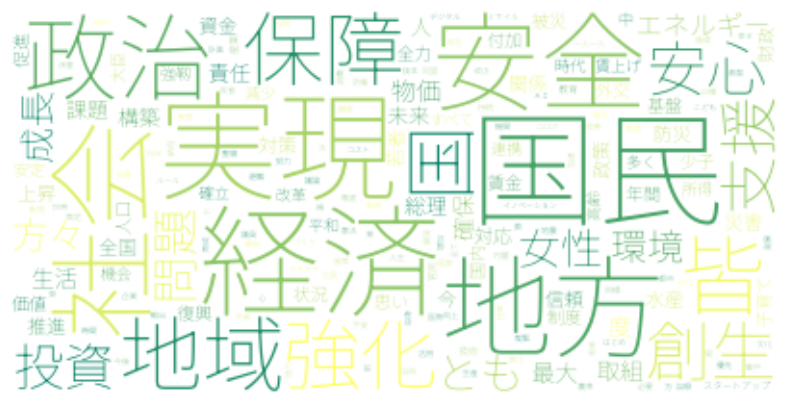

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("wc_ishiba.png")

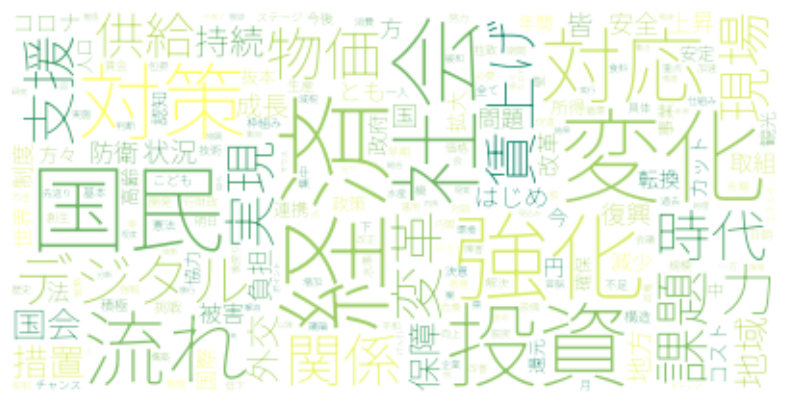

In [ ]:
wordcloud.generate_from_frequencies(freq_kishida)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("wc_kishida.png")

Судя по облаку слов, курс Исиба больше направлен на проблемы внешней политики, гендерного неравенства и экологии. Курс Кисида же больше сосредоточен на мерах экономического регулирования.

In [ ]:
# Рассчитаем длину предложений.
sentences_ishiba = re.split(r'[。！？]', filtered_text_ishiba)

sentence_lengths = [len(sentence) for sentence in sentences_ishiba if sentence] # Длина каждого предложения

sentence_lengths_series1 = pd.Series(sentence_lengths)
mean_length1 = sentence_lengths_series1.mean()

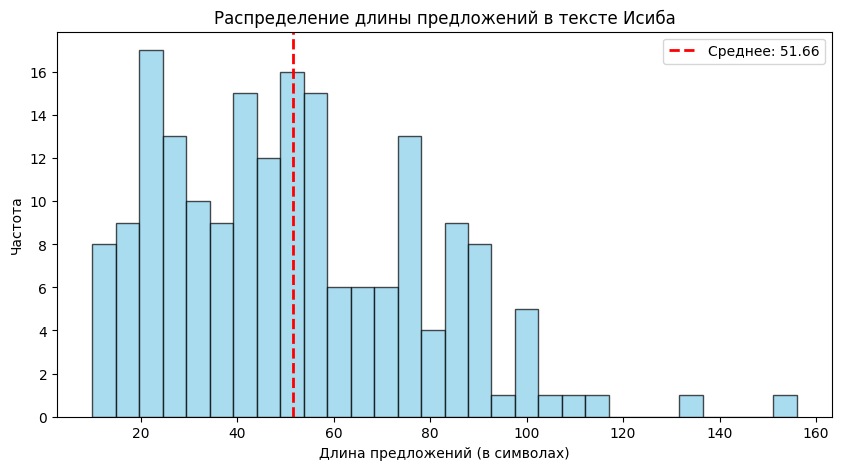

In [ ]:
# Визуализации
plt.figure(figsize=(10, 5))
sentence_lengths_series1.plot(kind="hist", bins=30, color="skyblue", edgecolor="black", alpha=0.7)

# Добавляем вертикальную линию для средней длины
plt.axvline(mean_length1, color="red", linestyle="dashed", linewidth=2, label=f'Среднее: {mean_length1:.2f}')

plt.xlabel("Длина предложений (в символах)")
plt.ylabel("Частота")
plt.title("Распределение длины предложений в тексте Исиба")
plt.legend()
plt.show()

In [ ]:
unique_lengths = sorted(set(sentence_lengths))
print(unique_lengths[:10])

[10, 12, 14, 15, 16, 17, 18, 19, 20, 21]


Это 10 самых коротких предложений.

In [ ]:
print(unique_lengths[-10:])

[92, 93, 100, 101, 102, 105, 109, 117, 133, 156]


10 самых длинных. То же самое проделаем для текста Кисида.

In [ ]:
sentences_kishida = re.split(r'[。！？]', filtered_text_kishida)

sentence_lengths1 = [len(sentence) for sentence in sentences_kishida if sentence]

sentence_lengths_series = pd.Series(sentence_lengths1)
mean_length = sentence_lengths_series.mean()

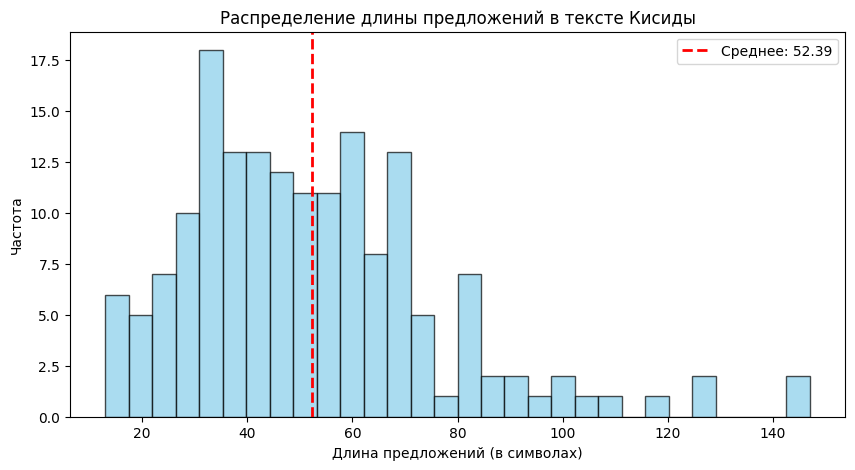

In [ ]:
plt.figure(figsize=(10, 5))
sentence_lengths_series.plot(kind="hist", bins=30, color="skyblue", edgecolor="black", alpha=0.7)

# Добавляем вертикальную линию для средней длины
plt.axvline(mean_length, color="red", linestyle="dashed", linewidth=2, label=f'Среднее: {mean_length:.2f}')
plt.xlabel("Длина предложений (в символах)")
plt.ylabel("Частота")
plt.title("Распределение длины предложений в тексте Кисиды")
plt.legend()

plt.show()

Предложения Кисида в среднем длиннее, чем у Исиба, но у Исиба встречаются предложения гораздо длиннее, чем у Кисида(160 символов и более).

In [ ]:
unique_lengths1 = sorted(set(sentence_lengths1))
print(unique_lengths1[:10])

[13, 14, 15, 18, 19, 21, 22, 23, 25, 26]


10 самых коротких предложений.

In [ ]:
print(unique_lengths1[-10:])

[89, 94, 100, 104, 109, 117, 126, 127, 145, 147]


    10 самых длинных предложений.
    
    Так как метаданных слишком мало, чтобы делать по ним распредление, то я решила отобразить распределение предложений.

    Пункт 6 отражен в пункте 2.

7. Корреляции

Гипотеза: есть зависимость между количеством знаков и продолжительностью речи.

In [ ]:
list_char = [char_count_kishida, char_count_ishiba]
df["char_count"] = list_char
print(df)

                        title author       date  parts  \
0  第二百十二回国会における岸田内閣総理大臣所信表明演説   岸田文雄 2023-10-23      5   
1  第二百十四回国会における石破内閣総理大臣所信表明演説    石破茂 2024-10-04      7   

                                             content        duration  \
0  演説全文を読む, はじめに　～変化の流れを掴み取る～, 経済・経済・経済, 社会, 外交・安... 0 days 00:34:16   
1  演説全文を読む, はじめに, ルールを守る, 日本を守る, 国民を守る, 地方を守る, 若者... 0 days 00:34:54   

             genre  year  month  day  char_count  
0  official speech  2023     10   23        8119  
1  official speech  2024     10    4        9015  


In [ ]:
correlation_matrix = df[["char_count", "duration"]].corr()

In [ ]:
print(correlation_matrix)

            char_count  duration
char_count         1.0       1.0
duration           1.0       1.0


Показатели корреляции говорят о том, что данных слишком мало, чтобы делать выводы. Необходимо увеличить количество текстов, чтобы сдлеать более содержательный анализ.

Пункт 8 отражен в соответствующих пунктах.

9. Формулировка гипотез

    Гипотеза №1:
   
    Для Исиба приоритетнее вопросы внешней политики, поэтому в его речи больше топонимов, обозначающих места и страны за границей.

In [ ]:
wcpos4 = Counter()
for line in filtered_text_ishiba.split("\n"):
    for word in tagger(line):
        if (word.feature.pos2 == '固有名詞' and not
            word.feature.pos3 == '人名'):
            wcpos4[word.surface] += 1

print("Имена собственные:")
for key, val in wcpos4.most_common(10):
    print(val, key)

Most common proper nouns:
34 日本
4 ウクライナ
4 アジア
4 沖縄
4 能登
3 米国
3 中国
2 国連
2 ロシア
2 インド


In [ ]:
wcpos3 = Counter()
for line in filtered_text_kishida.split("\n"):
    for word in tagger(line):
        if (word.feature.pos2 == '固有名詞' and not
            word.feature.pos3 == '人名'):
            wcpos3[word.surface] += 1

print("Имена собственные:")
for key, val in wcpos3.most_common(10):
    print(val, key)



Most common proper nouns:
20 日本
3 令和
3 沖縄
3 中国
2 米国
2 福島
2 大阪
2 関西
2 ロシア
2 ウクライナ


In [ ]:
data_ishiba = {
    "Япония": 34,
    "Украина": 4,
    "Азия": 4,
    "Окинава": 4,
    "Ното": 4,
    "США": 3,
    "КНР": 3,
    "ООН": 2,
    "РФ": 2,
    "Индия": 2
}

data_kishida = {
    "Япония": 20,
    "Окинава": 3,
    "КНР": 3,
    "США": 2,
    "Фукусима": 2,
    "Осака": 2,
    "Кансай": 2,
    "РФ": 2,
    "Украина": 2
}

# Создание DataFrame
df_ishiba = pd.DataFrame(list(data_ishiba.items()), columns=["Исиба", "Частота"])
df_kishida = pd.DataFrame(list(data_kishida.items()), columns=["Кисида", "Частота"])

# Объединение таблиц по строкам
df_combined = pd.merge(df_ishiba, df_kishida, left_on="Исиба", right_on="Кисида", how="outer").fillna(0)

# Отображение таблицы
df_combined

,Исиба,Частота_x,Кисида,Частота_y
0,Азия,4.0,0,0.0
1,Индия,2.0,0,0.0
2,КНР,3.0,КНР,3.0
3,0,0.0,Кансай,2.0
4,Ното,4.0,0,0.0
5,ООН,2.0,0,0.0
6,Окинава,4.0,Окинава,3.0
7,0,0.0,Осака,2.0
8,РФ,2.0,РФ,2.0
9,США,3.0,США,2.0


    Вывод: в речи Исиба чаще встречаются топонимы, обозначающие места и страны за пределами Японии, чем в речи Кисида.

    Гипотеза №2:

    У Кисида более длинные предложения, потому что он поднял в своем выступлении больше тем(количество тем = количество частей).

In [ ]:
mean_list = [52.39, 51.66]
df['mean_sent'] = mean_list

In [ ]:
correlation_matrix1 = df[['mean_sent', "parts"]].corr()

In [ ]:
print(correlation_matrix1)

           mean_sent  parts
mean_sent        1.0   -1.0
parts           -1.0    1.0


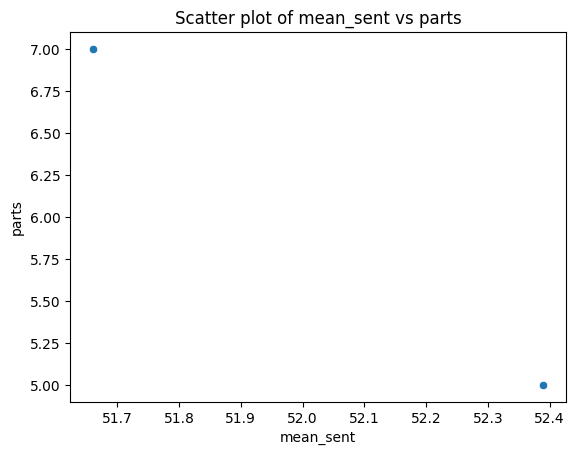

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x="mean_sent", y="parts")
plt.title("Scatter plot of mean_sent vs parts")
plt.show()

В этой ситуации можно сказать, что гипотеза не подтвердилась, так как значение корреляции отрицательное, что говорит об отсутсвии взаимосвязи.

10. Вывод:

    - Необходимо собрать больше данных, чтобы можно было выделить взаимосвязи.
    - Также можно было применить тематическое моделирование, чтобы определить тематический фокус.
    - Хотелось бы провести более подробный синтаксический анализ, для этого нужно выделить частоту по частям речи с помощью другой библиотеки.

# Домашнее задание № 2


В рамках данного задания передо мной стояла задача анализа двух текстов, которые являются стилистически и жанрово однородными. Это делает затруднительным применение моделей машинного обучения с учителем, так как:

    - Невозможно или нецелесообразно сформулировать чёткую целевую переменную, которую модель могла бы предсказывать.

    - Попытка использовать модели с учителем на уровне предложений или слов (например, для классификации по принадлежности к одному из текстов) не дала бы содержательных результатов из-за схожести лексики и стиля.

В связи с этим, я выбрала метод машинного обучения без учителя – тематическое моделирования. Этот подход позволяет:

    - Выявить скрытые темы, представленные в текстах, без необходимости вручную размечать данные.

    - Получить интерпретируемые характеристики текстов, сравнить их тематическую структуру и выявить возможные различия или акценты.
Что касается критерия разбиения на тренировочную и тестовую выборки, который упоминается в задании, он является актуальным для моделей с учителем, где необходимо оценивать обобщающую способность модели. В обучении без учителя такой процедуры нет, так как цель – выявление структуры данных, а не предсказание.

## Этап №1 - Формулировка гипотез

Нулевая гипотеза:

    - Тематика, поднимаемая в инаугурационной речи Исибы Сигэру, не отличается значимо от тематики в речи Кисиды Фумио.

Альтернативная гипотеза:

    - Тематика, поднимаемая в инаугурационной речи Исибы, существенно отличается от тематики в речи Кисиды.

## Этап №2 - Предобработка данных

Частично выполнен выше, в ДЗ №1.

Для предварительного анализа тематического содержания двух речей был применён метод TF-IDF, позволяющий определить, какие слова являются наиболее значимыми в каждом тексте с учётом их относительной частотности. Это позволило выделить характерные лексические особенности каждого документа, что служит основой для более глубокой тематической интерпретации или дальнейшего машинного анализа (например, кластеризации или тематического моделирования).

In [ ]:
# Разделим текст на предложения - Исиба
import functools
from ja_sentence_segmenter.common.pipeline import make_pipeline
from ja_sentence_segmenter.concatenate.simple_concatenator import concatenate_matching
from ja_sentence_segmenter.normalize.neologd_normalizer import normalize
from ja_sentence_segmenter.split.simple_splitter import split_newline, split_punctuation

split_punc2 = functools.partial(split_punctuation, punctuations=r"。!?")
concat_mail_quote = functools.partial(concatenate_matching,
  former_matching_rule=r"^(\s*[>]+\s*)(?P<result>.+)$",
  latter_matching_rule=r"^(\s*[>]+\s*)(?P<result>.+)$",
  remove_former_matched=False,
  remove_latter_matched=True)
segmenter = make_pipeline(normalize, split_newline, concat_mail_quote, split_punc2)
sentences = list(segmenter(filtered_text_ishiba))

# Разделим текст на предложения - Кисида

sentences_kishida = list(segmenter(filtered_text_kishida))

In [ ]:
from fugashi import Tagger
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Инициализируем теггер
tagger = Tagger()

# Стоп-слова, которые хотим исключить (можно расширить)
stop_words = {"こと", "日本", "もの", "よう", "それ", "これ", "あれ", "ため", "ところ", "場合", "何", "私", "僕", "あなた", "年", "する", "し", 'い', "いき", "さ", "まいり"}

# Функция токенизации для TfidfVectorizer
def tokenize(text):
    words = []
    for word in tagger(text):
        # Берём только нужные части речи
        if word.feature.pos1 in {'名詞', '動詞', '形容詞', '副詞'} and word.surface not in stop_words:
            words.append(word.surface)
    return words

# Создаём векторизатор с нашей токенизацией
vectorizer = TfidfVectorizer(tokenizer=tokenize)

# Обучаем и трансформируем корпус в tf-idf матрицу
tfidf_matrix = vectorizer.fit_transform(sentences)

# Получаем список всех слов
feature_names = vectorizer.get_feature_names_out()

tfidf_sum = np.array(tfidf_matrix.sum(axis=0)).flatten()

# Индексы слов, отсортированные по убыванию важности
top_n = 10
top_indices = tfidf_sum.argsort()[::-1][:top_n]

print(f"Топ {top_n} самых значимых слов в корпусе:")

for idx in top_indices:
    print(f"{feature_names[idx]}: {tfidf_sum[idx]:.4f}")

Топ 10 самых значимых слов в корпусе:
地方: 6.3304
国民: 6.3179
政治: 5.5528
経済: 5.4309
社会: 4.9723
安全: 4.9615
実現: 4.6387
創生: 4.4116
皆: 4.2842
保障: 4.2594


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


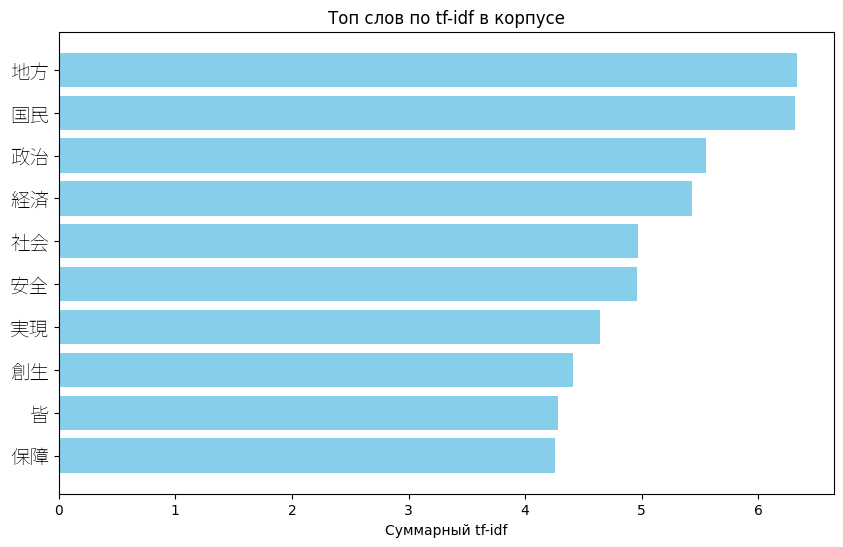

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

top_words = [feature_names[i] for i in top_indices]
top_scores = tfidf_sum[top_indices]

font_path = 'NotoSansJP-VariableFont_wght.ttf'  # путь к файлу шрифта
font_prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(10,6))
plt.barh(top_words[::-1], top_scores[::-1], color='skyblue')

plt.xlabel('Суммарный tf-idf')
plt.title('Топ слов по tf-idf в корпусе')

# Применяем шрифт к меткам по оси y (словам)
plt.yticks(fontproperties=font_prop, fontsize=14)
plt.show()


    Выше представлена визуализация самых важных слов в тексте выступления Исиба Сигэру. Можно заметить, что они несколько отличаются от самых частотных в речи слов. Например, слово 国民 (народ) является самым частотным, но при этом не самым важным в документе. Самым важным при подсчете с помо- щью tf-idf оказалось слово 地方(регионы) – показатель tf-idf 6,33, что дает осно-вание полагать, что одной из ключевых тем являются регионы и их развитие;чуть менее важным оказалось слово 国民(граждане) - показатель tf-idf 6.32, что, вероятно, отражает акцент на обещаниях народу и его интересах; далее – слово 政治(политика) с показателем 5.55; затем можно выделить сферы, в которых, вероятно, есть политические вызовы и проблемы, которые необходимо решать 経済(экономика) - 5.43,  社会 (общество)- 4.97 и 安全(безопасность) -  4.9615; далее идут слова, которые характерны для политического дискурса, так как выражают призыв, убеждение, мотивацию - 実現(осуществление) с  tf-idf 4.64,  創生(возрождение) - 4.41, 皆(все) - 4.28, 保障(гарантии) - 4.26.
	Итак, можно заметить, что частотность слов и их важность по tf-idf отличается для текста речи Исиба Сигэру.


In [ ]:
tfidf_matrix = vectorizer.fit_transform(sentences_kishida)

# Получаем список всех слов
feature_names_k = vectorizer.get_feature_names_out()

tfidf_sum_k = np.array(tfidf_matrix.sum(axis=0)).flatten()

# Индексы слов, отсортированные по убыванию важности
top_n = 10
top_indices_k = tfidf_sum_k.argsort()[::-1][:top_n]

print(f"Топ {top_n} самых значимых слов в корпусе:")

for idx in top_indices:
    print(f"{feature_names[idx]}: {tfidf_sum[idx]:.4f}")

Топ 10 самых значимых слов в корпусе:
経済: 7.1417
変化: 6.5345
社会: 5.1192
国民: 4.3132
強化: 4.0684
流れ: 4.0162
対策: 3.6676
デジタル: 3.5835
投資: 3.1099
進め: 2.9754


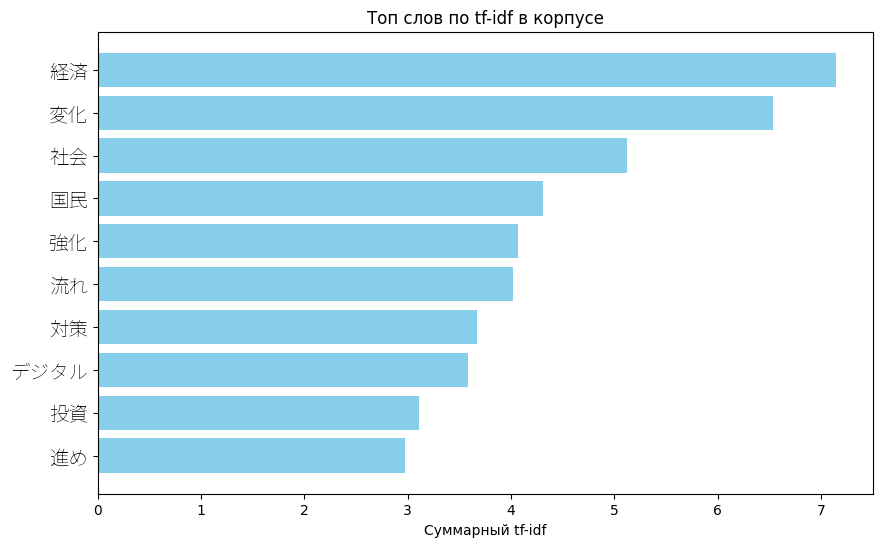

In [ ]:
top_words_k = [feature_names_k[i] for i in top_indices_k]
top_scores_k = tfidf_sum_k[top_indices_k]

font_path = 'NotoSansJP-VariableFont_wght.ttf'  # путь к файлу шрифта
font_prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(10,6))
plt.barh(top_words_k[::-1], top_scores_k[::-1], color='skyblue')

plt.xlabel('Суммарный tf-idf')
plt.title('Топ слов по tf-idf в корпусе')

# Применяем шрифт к меткам по оси y (словам)
plt.yticks(fontproperties=font_prop, fontsize=14)
plt.show()

В случае речи Кисида Фумио слова также несколько изменились: центральной темой все равно осталась экономика (経済) – 7,14, что объяснимо в связи с предложенной им программой «нового капитализма» и прочих финансовых реформ; реформы нашли отражение в следующем по слове – 変化(изменение; 6,53), что показывает, что идея трансформаций и перемен - одна из центральных в выступлении; далее следуют слова, показывающие фокус на интересах общества(社会) и граждан(国民) – 5,12 и 4,31; слова 強化 (усиление, 4.06) и 対策 (контрмеры, 3.66) перекликаются с идеей реформ, экономическими вызовами и сложностями, связанными с коронавирусом; развивая финансовую тему, стоит упомянуть и 投資 (инвестиции, 3.11),  и слово 流れ (поток, 4.01), которые подчеркивают, что выступление строилось вокруг упоминания конкретных экономических мер; с показателем 2,97 алгоритм также выделил слово, очень свойственное для политического дискурса, - 進め (продвижение), которое может характеризовать обещание, выражение намерения.

Проведенный количественно-лингвистический анализ показал, что в языковом материале используются схожие лексические единицы и поднимаются одни и те же темы. Однако при глубоком рассмотрении можно заметить, что акценты в политическом курсе различаются.

## Этап №3 - Тематическое моделирование

На данном этапе был использован метод тематического моделирования, чтобы проанализировать, какие темы были общие в выступлениях премьер-министров. В ходе работы была решена проблема тестовой и обучающей выборки. Пусть обучающей будет речь Исиба, так как она объемнее, а тестовой - Кисида. Так как модель учится на выборке Исибы, то в тексте Кисида она будет выбирать только темы, которые встречались у Исиба.

In [ ]:
!pip install mecab-python3 #установка библиотеки

In [ ]:
import MeCab

mt = MeCab.Tagger('')#токенизация
mt.parse('')
stop_words = {"三十","方々","人","五","一","四","三","よる","おり","二","国","いる", "なり","ある", "あり","より", "〇", "こと", "日本", "もの", "よう", "それ", "これ", "あれ", "ため", "ところ", "場合", "何", "私", "僕", "あなた", "年", "する", "し", 'い', "いき", "さ", "まいり", "一", "とも"}


# Исиба — обучение, отбираются слова в предложениях (существительные, глаголы, прилагательные) и убираются стоп-слова
train_texts = []
for line in sentences:
    text = []
    node = mt.parseToNode(line.strip())
    while node:
        fields = node.feature.split(",")
        if fields[0] in ['名詞', '動詞', '形容詞']:
            if node.surface not in stop_words:
                text.append(node.surface)
        node = node.next
    train_texts.append(text)

# Кисида — тест, та же процедура
test_texts = []
raw_test_texts = []
for line in sentences_kishida:
    text = []
    raw_test_texts.append(line.strip())
    node = mt.parseToNode(line.strip())
    while node:
        fields = node.feature.split(",")
        if fields[0] in ['名詞', '動詞', '形容詞']:
            if node.surface not in stop_words:
                text.append(node.surface)
        node = node.next
    test_texts.append(text)



Согласованность темы (когерентность) в LDA - это метрика, которая измеряет, насколько хорошо слова внутри каждой темы связаны между собой и насколько хорошо эти темы интерпретируются человеком. Эта метрика помогает оценить качество полученных тем в модели LDA и помогает выбрать наиболее подходящее число тем для анализа, так как LDA - это модель, которая обучается без учителя. Для оценки был использован показатель C_v, основанный на скользящем окне, однократной сегментации верхних слов и показателе косвенного подтверждения, который использует нормализованную поточечную взаимную информацию (NPMI) и косинусоидальное сходство (https://www.kaggle.com/code/trnduythanhkhttt/lda-and-topic-coherence-score).


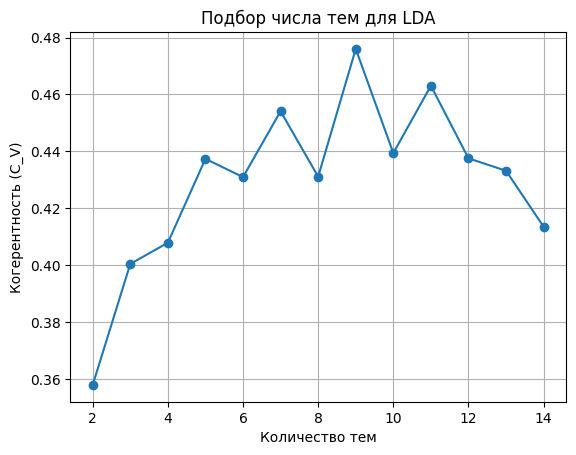

In [ ]:
# импорт библиотек
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from collections import defaultdict
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

# Построение словаря и корпуса
dictionary = Dictionary(train_texts)
corpus = [dictionary.doc2bow(text) for text in train_texts]

# Попробуем разные значения числа тем
topic_range = range(2, 15)
coherence_values = []
models = []

# Обучение LDA и расчёт когерентности
for num_topics in topic_range:
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)
    models.append(model)

    coherence_model = CoherenceModel(model=model, texts=train_texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    coherence_values.append(coherence)


# Построим график
plt.plot(topic_range, coherence_values, marker='o')
plt.xlabel("Количество тем")
plt.ylabel("Когерентность (C_V)")
plt.title("Подбор числа тем для LDA")
plt.grid(True)
plt.show()


Оптимальное количество тем - 9.

In [ ]:
# Построение модели LDA
NUM_TOPICS = 9
lda = LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

# Применение к тестовому корпусу
test_corpus = [dictionary.doc2bow(text) for text in test_texts]

# Вывод темы для первых 10-ти предложений из речи Кисиды
from collections import defaultdict
for unseen_doc, raw_test_text in list(zip(test_corpus, raw_test_texts))[:10]:
    print(f"【{raw_test_text}】")
    topic_scores = defaultdict(float)
    for topic_id, score in lda[unseen_doc]:
        topic_scores[topic_id] = score
    for i in range(NUM_TOPICS):
        print(f"Тема {i}: {topic_scores[i]:.2f}")
    print("-" * 10)


【一はじめに～変化の流れを掴(つか)み取る～】
Тема 0: 0.42
Тема 1: 0.02
Тема 2: 0.02
Тема 3: 0.20
Тема 4: 0.02
Тема 5: 0.02
Тема 6: 0.02
Тема 7: 0.02
Тема 8: 0.24
----------
【第二百十二回臨時国会の開会にあたり所信の一端を申し述べます。】
Тема 0: 0.03
Тема 1: 0.03
Тема 2: 0.41
Тема 3: 0.03
Тема 4: 0.03
Тема 5: 0.03
Тема 6: 0.03
Тема 7: 0.03
Тема 8: 0.40
----------
【日本国内閣総理大臣として、私の頭に今あるもの、それは、「変化の流れを絶対に逃さない、掴み取る」の一点です。】
Тема 0: 0.02
Тема 1: 0.30
Тема 2: 0.02
Тема 3: 0.15
Тема 4: 0.02
Тема 5: 0.02
Тема 6: 0.02
Тема 7: 0.02
Тема 8: 0.45
----------
【岸田内閣は、防衛力の抜本的強化、エネルギー政策の転換、次元の異なるこども・子育て政策をはじめ、時代の変化に応じた先送りできない課題に一つ一つ挑戦し、結果をお示ししてきました。】
Тема 0: 0.00
Тема 1: 0.46
Тема 2: 0.00
Тема 3: 0.24
Тема 4: 0.00
Тема 5: 0.00
Тема 6: 0.09
Тема 7: 0.00
Тема 8: 0.18
----------
【今後も、物価高をはじめ国民が直面する課題に、「先送りせず、必ず答えを出す」との不撓(ふとう)不屈(ふくつ)の覚悟をもって取り組んでいきます。】
Тема 0: 0.47
Тема 1: 0.13
Тема 2: 0.23
Тема 3: 0.00
Тема 4: 0.13
Тема 5: 0.00
Тема 6: 0.00
Тема 7: 0.00
Тема 8: 0.00
----------
【最初に掴まなければならない変化の流れは、「経済」です。】
Тема 0: 0.19
Тема 1: 0.02
Тема 2: 0.02
Тема 3: 0.31
Те

In [ ]:
# Выведем ключевые слова для каждой темы
for i, topic in lda.print_topics():
    print(f"Тема {i}: {topic}")

Тема 0: 0.012*"地域" + 0.009*"地方" + 0.008*"大臣" + 0.008*"創生" + 0.008*"ミサイル" + 0.007*"実現" + 0.007*"北朝鮮" + 0.007*"アジア" + 0.007*"社会" + 0.007*"取組"
Тема 1: 0.014*"自殺" + 0.010*"減少" + 0.010*"若者" + 0.010*"女性" + 0.010*"人口" + 0.010*"守る" + 0.010*"増加" + 0.010*"上げ" + 0.008*"率" + 0.007*"主張"
Тема 2: 0.016*"経済" + 0.012*"政治" + 0.012*"国民" + 0.010*"皆" + 0.010*"創生" + 0.010*"地方" + 0.010*"実現" + 0.010*"生活" + 0.009*"強化" + 0.008*"向け"
Тема 3: 0.016*"保障" + 0.014*"経済" + 0.013*"子育て" + 0.013*"安全" + 0.013*"地方" + 0.011*"実現" + 0.011*"今" + 0.008*"問題" + 0.008*"人生" + 0.008*"守り"
Тема 4: 0.022*"社会" + 0.017*"地域" + 0.013*"実現" + 0.011*"経済" + 0.011*"水産" + 0.008*"復興" + 0.008*"保障" + 0.007*"国民" + 0.007*"防災" + 0.007*"向け"
Тема 5: 0.017*"国民" + 0.017*"守る" + 0.014*"皆" + 0.012*"投資" + 0.011*"最大" + 0.009*"未来" + 0.009*"経済" + 0.009*"度" + 0.008*"構築" + 0.007*"多く"
Тема 6: 0.021*"国民" + 0.018*"政治" + 0.015*"地方" + 0.012*"実現" + 0.011*"創生" + 0.011*"環境" + 0.011*"経済" + 0.010*"強化" + 0.010*"物価" + 0.009*"対応"
Тема 7: 0.014*"安全" + 0.012*"推進" + 0.010*"経済" + 0

Стоит отметить, что финальные темы были получены не сразу: модель корректировалась за счет добавления новых стоп-слов и изменения количества тем. Итак, из полученного результата можно выделить следующие темы:

Тема 0 - Региональное развитие и вызовы в Азии (Ключевые слова: 地域 (регионы), 地方 (местности), 大臣 (министр), 創生 (возрождение), ミサイル (ракета), 北朝鮮 (КНДР), アジア (Азия));

Тема 1 — Демография и социальные проблемы (Ключевые слова: 自殺 (самоубийство), 減少 (снижение), 若者 (молодёжь), 女性 (женщины), 守る (защищать), 増加 (рост), 人口 (население));

Тема 2 — Региональная экономика (Ключевые слова: 経済 (экономика), 創生 (возрождение), 生活 (повсдневная жизнь), 強化 (усиление/рост));

Тема 3 — Социальное обеспечение (Ключевые слова: 保障 (гарантия), 子育て (воспитание детей), 安全 (безопасность), 人生 (жизнь), 守り (защита));

Тема 4 — Региональное восстановление после природных бедствий (Ключевые слова: 社会 (общество), 地域 (регионы), 水産 (рыболовство), 復興 (восстановление), 防災 (защита от бедствий));

Тема 5 — Будущее и инвестиции (Ключевые слова: 国民 (народ), 守る (защита), 投資 (инвестиции), 最大 (максимум), 未来 (будущее), 構築 (построение));

Тема 6 — Политика и окружающая среда (Ключевые слова: 政治 (политика), 環境 (окружающая среда), 創生 (возрождение), 対応 (реагирование));

Tема 7 — Продвижение политики роста и культурного развития (Kлючевые слова: 推進 (продвижение), 対策 (меры), 成長 (рост), 文化 (культура));

 Тема 8 — Энергетика, дипломатия и политика (Ключевые слова: エネルギー (энергия), 外交 (дипломатия), 政策 (политика), 資金 (финансы))

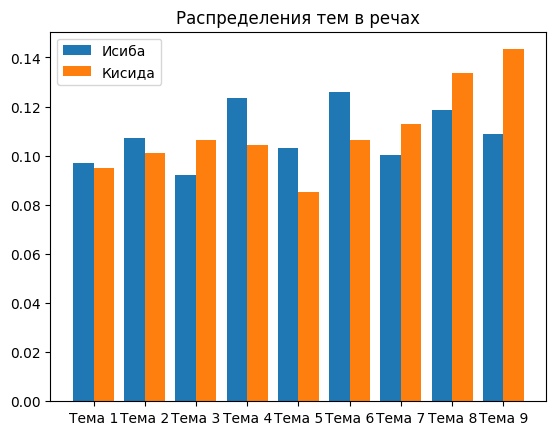

In [ ]:
# Построим визуализацию для сравнения распределений тем
import numpy as np
import matplotlib.pyplot as plt

# Определим функцию
def avg_topic_distribution(texts, lda_model, dictionary):
    # Создание мешка слов
    corpus = [dictionary.doc2bow(text) for text in texts]
    # Получение распределения по темам из модели LDA для каждого документа
    topic_distributions = [lda_model[doc] for doc in corpus]
    # Преобразование в массив (NUM_TOPICS,)
    num_topics = lda_model.num_topics
    # Создание матрицы нулей размера (число документов, число тем), куда будут записываться вероятности
    topic_matrix = np.zeros((len(topic_distributions), num_topics))

    for i, dist in enumerate(topic_distributions): # для каждого документа и каждой темы записывает соответствующую вероятность
        for topic_id, prob in dist:
            topic_matrix[i, topic_id] = prob
    return topic_matrix.mean(axis=0) # среднее распределение тем по всем текстам

dist_ishiba = avg_topic_distribution(train_texts, lda, dictionary)
dist_kishida = avg_topic_distribution(test_texts, lda, dictionary)

# Построим столбчатую диаграмму
x = np.arange(len(dist_ishiba))
plt.bar(x - 0.2, dist_ishiba, width=0.4, label="Исиба")
plt.bar(x + 0.2, dist_kishida, width=0.4, label="Кисида")
plt.xticks(x, [f"Тема {i+1}" for i in x]) # Чтобы нумерация начиналась с 1
plt.legend()
plt.title("Распределения тем в речах")
plt.show()


Однако гипотезу можно принять или отвергнуть только после проведения статистического теста. Можно провести сравнение тематических распределений с использованием t-теста, однако из-за ограничений применимости данного теста к вероятностным распределениям (нормальность, равенство дисперсий), можно также использовать непараметрический критерий Манна–Уитни. Таким образом, выводы нужно строить преимущественно на более устойчивом тесте.

In [ ]:
import numpy as np

# Функция для получения среднего распределения тем
def get_topic_distribution(corpus, lda_model, num_topics):
    topic_dists = []
    for doc in corpus:
        topic_dist = [0.0] * num_topics
        for topic_id, prob in lda_model[doc]:
            topic_dist[topic_id] = prob
        topic_dists.append(topic_dist)
    return np.array(topic_dists)

# Распределения тем для двух корпусов
topic_dists_ishiba = get_topic_distribution(corpus, lda, NUM_TOPICS)
topic_dists_kishida = get_topic_distribution(test_corpus, lda, NUM_TOPICS)


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# распределение вероятностей тем в одном документе.
for topic_id in range(NUM_TOPICS):
    topic_ishiba = topic_dists_ishiba[:, topic_id]
    topic_kishida = topic_dists_kishida[:, topic_id]

    # t-тест
    t_stat, p_value = ttest_ind(topic_ishiba, topic_kishida, equal_var=False)

    # тест Манна-Уитни
    u_stat, u_p = mannwhitneyu(topic_ishiba, topic_kishida, alternative='two-sided')

    print(f"Тема {topic_id+1}: t-test p-value = {p_value:.4f}, mannwhitney p-value = {u_p:.12f}")


Тема 1: t-test p-value = 0.9563, mannwhitney p-value = 0.000000502034
Тема 2: t-test p-value = 0.7713, mannwhitney p-value = 0.000000092989
Тема 3: t-test p-value = 0.3161, mannwhitney p-value = 0.000000005889
Тема 4: t-test p-value = 0.4292, mannwhitney p-value = 0.000003287692
Тема 5: t-test p-value = 0.4287, mannwhitney p-value = 0.000015715956
Тема 6: t-test p-value = 0.4193, mannwhitney p-value = 0.000000900942
Тема 7: t-test p-value = 0.5204, mannwhitney p-value = 0.000000023748
Тема 8: t-test p-value = 0.7772, mannwhitney p-value = 0.000000002836
Тема 9: t-test p-value = 0.2028, mannwhitney p-value = 0.000000000022


t-test не выявил значимых различий (все p-value > 0.2). Однако тест Манна–Уитни, который более устойчив к ненормальности распределений, показал значимые различия по всем темам (p-value < 0.001). Это значит, что распределения тем  различаются между речами Исибы и Кисиды.

## Выводы

Из визуализации:

В некоторых темах (например, Тема 3, 5, 8, 9) различия между Исибой и Кисидой кажутся довольно заметными. В других темах (например, Тема 1, 2, 4, 6) распределения схожи или различия минимальны.

Из статистических тестов:

Альтернативная гипотеза подтверждается. Тематика, поднимаемая в инаугурационной речи Исибы Сигэру, статистически значимо отличается от тематики речи Кисиды Фумио. Это подтверждено по всем темам согласно критерию Манна–Уитни (p < 0.001).